In [1]:
import commonmethods.image_modification as im

image = im.load_image_grayscale('5')

resized_image = im.resize_image(image, 1024)

In [2]:
import numpy as np

def get_window(image, row_number, column_number, px):
    """
    Method for getting the px x px sized window from the image.
    :param image: the image that I want to get the window from
    :param row_number: the row where the window left corner pixel should start
    :param column_number: the column where the window left corner pixel should start
    :param px: the width and height of the window
    :return: the px x px sized window from the image
    """
    window = np.zeros((px, px))

    for i in range(0, px):
        column = np.zeros((px))
        for j in range(0, px):
            column[j] = image[row_number+i][column_number+j]
        window[i] = column
    
    return window

In [3]:
import numpy as np

def get_window_values(image, window_quantity, px):
    """
    Method for getting random windows from the image, stacked in one vector. 
    The resulted vector size will be window_quantity x px*px.
    :param image: the image that i want to get the random windows from
    :param window_quantity: the amount of windows that i want to get
    :param px: the width and height of the windows
    :return: the result, which is the vector created from the 1 x px*px sized windows, 
        and the pixels, an array that contains the start pixels of the windows
    """
    height = image.shape[0]
    width = image.shape[1]
    
    pixels = np.zeros((window_quantity, 2))
    
    #get random window start pixels
    x = np.random.randint(0, height-px, window_quantity)
    y = np.random.randint(0, width-px, window_quantity)
    
    for i in range(window_quantity):
        window = get_window(image, x[i], y[i], px)
        window = window.reshape((1, -1))
        pixels[i] = [x[i], y[i]] #saving the start pixels of the windows
        
        if i == 0:
            result = np.array(window)
        else:
            result = np.vstack([result, window])
    
    return result, pixels

## RGB

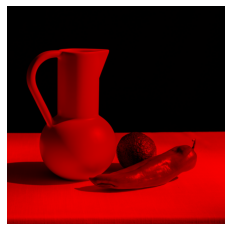

In [4]:
import cv2
from matplotlib import pyplot as plt

height = resized_image.shape[0]
width = resized_image.shape[1]

colored_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

R = 255
G = 0
B = 0
for i in range(height):
    for j in range(width):
        Y = resized_image[i][j]
        R_new = Y*R/255
        G_new = Y*G/255
        B_new = Y*B/255
        colored_image[i][j] = [R_new, G_new, B_new]
        
plt.axis("off")

plt.imshow(colored_image)

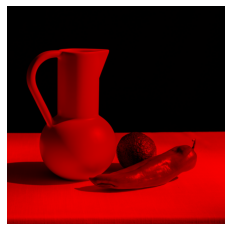

In [5]:
import numpy as np
import cv2

converted_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

r, g, b = cv2.split(converted_image)

color = [255, 0, 0]

np.multiply(r, color[0]/255, out=r, casting="unsafe")
np.multiply(g, color[1]/255, out=g, casting="unsafe")
np.multiply(b, color[2]/255, out=b, casting="unsafe")

colored_image = cv2.merge([r, g, b])

plt.axis("off")

plt.imshow(colored_image)

In [6]:
import math
from sklearn.neighbors import KNeighborsClassifier

px = 15
window_values, pixels = get_window_values(resized_image, 1000, px)
k = 5
_, labels, _ = im.kmeans_segmentation(window_values, k)

height = resized_image.shape[0]
width = resized_image.shape[1]

window_values = window_values.reshape((-1, 1))

label_map = np.full((height, width), -1)
train_labels = []

for i in range(len(pixels)):
    for j in range(0, px):
        for k in range(0, px):
            train_labels.append(labels[i])

chosen_k = int(math.sqrt(window_values.shape[0]))

knn_model = KNeighborsClassifier(n_neighbors=chosen_k)
knn_model.fit(window_values, train_labels)
            
for i in range(height):
    for j in range(width):
        if(label_map[i][j] == -1):
            test_pixel = resized_image[i][j]
            test_pixel = test_pixel.reshape((1, -1))

            predicted = knn_model.predict(test_pixel)
            
            label_map[i][j] = predicted

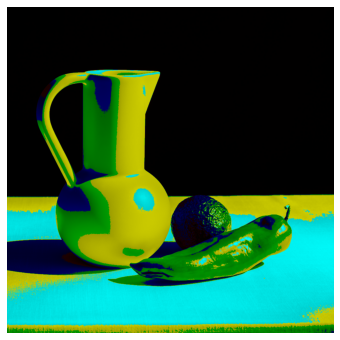

In [9]:
import cv2
import matplotlib.pyplot as plt

colored_image_rgb_all = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

colors = np.array([
    [255, 255, 0],   #yellow
    [0, 0, 255],     #blue
    [0, 255, 0],     #lime
    [0, 255, 255],   #cyan
    [255, 0, 0],     #red
    [255, 150, 0]    #orange
])

for i in range(height):
    for j in range(width):
        if(label_map[i][j] != -1):
            Y = resized_image[i][j]
            R_new = Y*colors[label_map[i][j]][0]/255
            G_new = Y*colors[label_map[i][j]][1]/255
            B_new = Y*colors[label_map[i][j]][2]/255
            new_color = [R_new, G_new, B_new]
            colored_image_rgb_all[i][j] = new_color

plt.figure(figsize=(6,6))

plt.axis("off")

plt.imshow(colored_image_rgb_all)

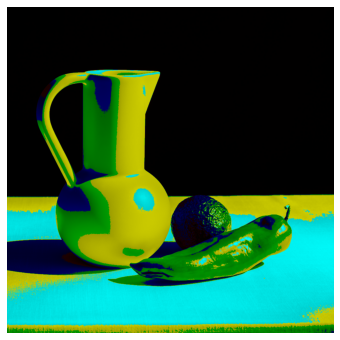

In [26]:
import numpy as np
import cv2

colored_image_rgb_multiply = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

r, g, b = cv2.split(colored_image_rgb_multiply)

k = 5
for i in range(0, k):
    np.multiply(r, colors[i][0]/255, out=r, 
                where=label_map==i, casting="unsafe")
    np.multiply(g, colors[i][1]/255, out=g, 
                where=label_map==i, casting="unsafe")
    np.multiply(b, colors[i][2]/255, out=b, 
                where=label_map==i, casting="unsafe")

colored_image_rgb_multiply = cv2.merge([r, g, b])

plt.figure(figsize=(6,6))

plt.axis("off")

plt.imshow(colored_image_rgb_multiply)

## HSV

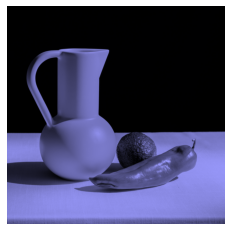

In [58]:
import colorsys
color = [255, 0, 0]
color_hsv = colorsys.rgb_to_hsv(color[0]/255, color[1]/255, color[2]/255)

colored_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

hsv_image = cv2.cvtColor(colored_image_rgb, cv2.COLOR_RGB2HSV)

test = hsv_image

for i in range(1024):
    for j in range(1024):
        test[i][j] = [120, 100, hsv_image[i][j][2]]

plt.axis("off")

test_rgb = cv2.cvtColor(test, cv2.COLOR_HSV2RGB)

plt.imshow(test_rgb)